In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('../data/data.csv', encoding='ISO-8859-1')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create TotalAmount column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


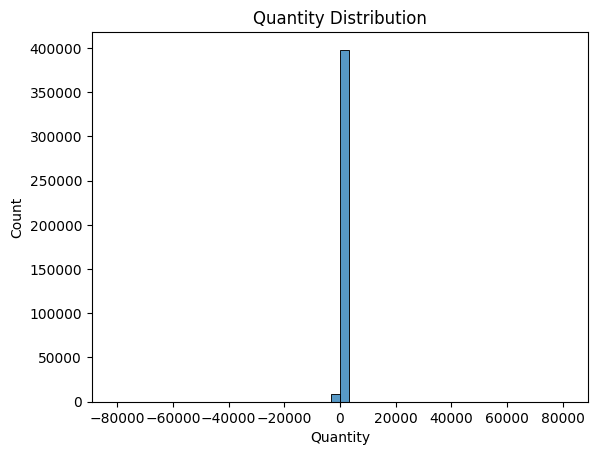

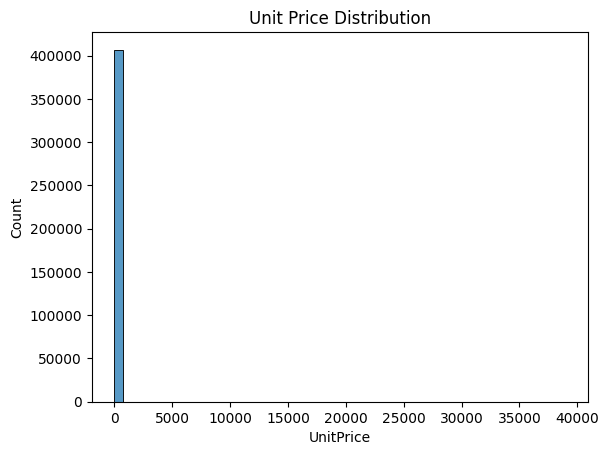

In [5]:
# Quantity distribution
sns.histplot(df['Quantity'], bins=50)
plt.title('Quantity Distribution')
plt.show()

# Unit Price distribution
sns.histplot(df['UnitPrice'], bins=50)
plt.title('Unit Price Distribution')
plt.show()


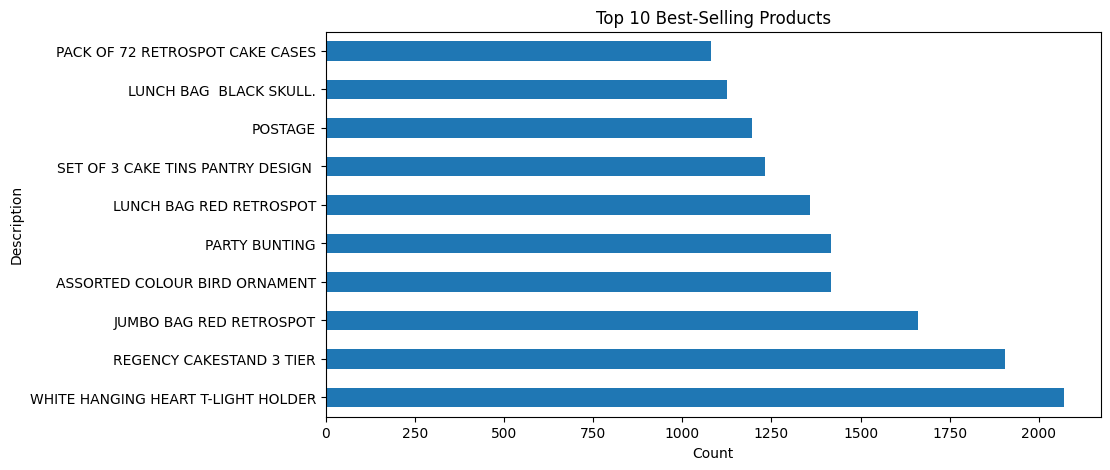

In [6]:
top_products = df['Description'].value_counts().head(10)
top_products.plot(kind='barh', figsize=(10,5), title='Top 10 Best-Selling Products')
plt.xlabel('Count')
plt.show()


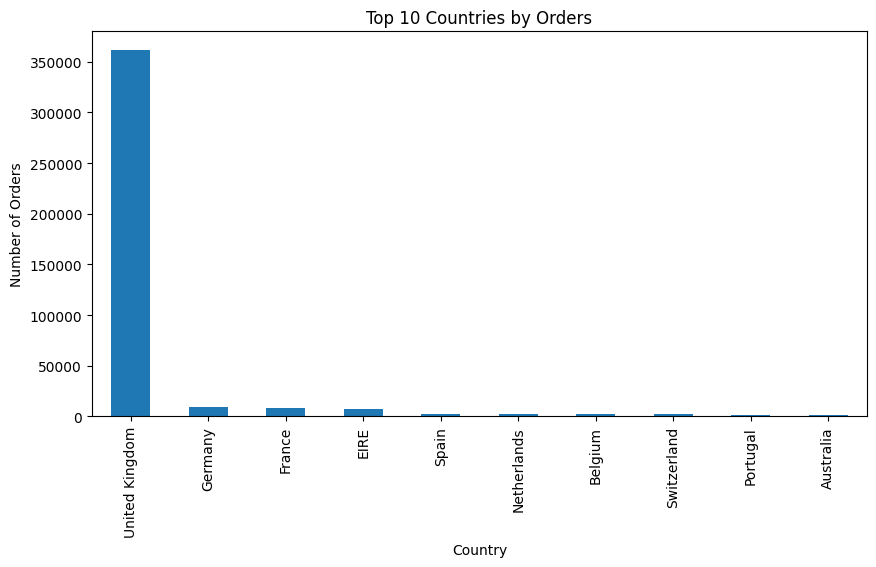

In [7]:
df['Country'].value_counts().head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Countries by Orders')
plt.ylabel('Number of Orders')
plt.show()


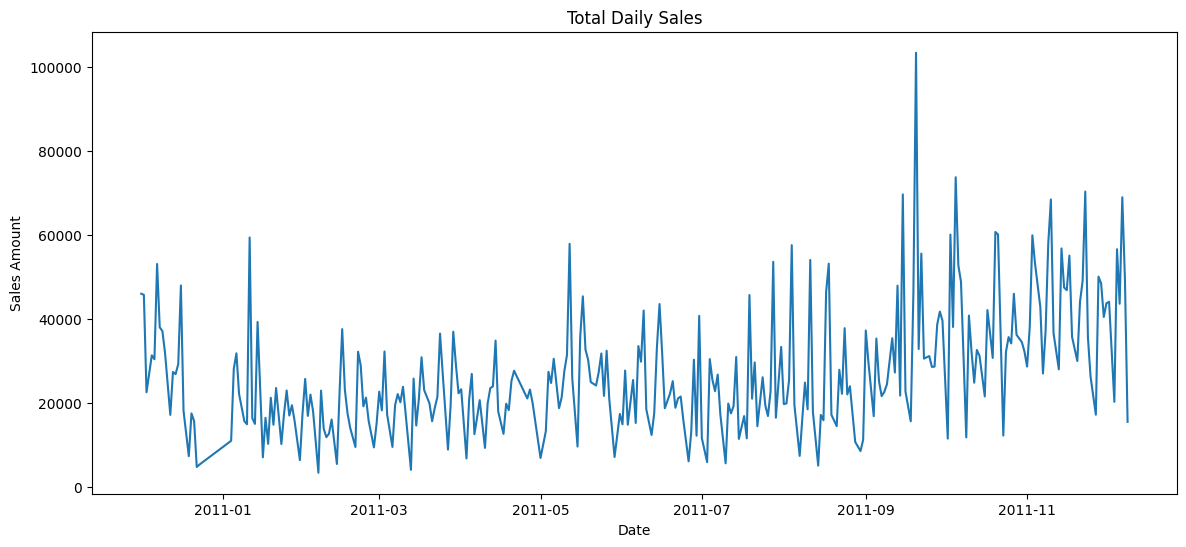

In [8]:
sales_by_day = df.groupby(df['InvoiceDate'].dt.date)['TotalAmount'].sum()
sales_by_day.plot(figsize=(14,6), title='Total Daily Sales')
plt.ylabel('Sales Amount')
plt.xlabel('Date')
plt.show()


 markdown cell summarizing key insights:

🛍️ Most sold product: ...

🌍 Top buying country: ...

💰 Peak sales date range: ...

🧼 Data cleaning: Removed ... missing customers, ... duplicates (if any)